# Projection number of events

We estimate the number of detections for a given population of events and a given network configuration.

In [1]:
import numpy as np
from scipy.integrate import trapz

#PYTHON MODULES
from spectral_sirens.utils.constants import *
from spectral_sirens.gw_population import gwpop
from spectral_sirens.utils import utils
from spectral_sirens.detectors import sensitivity_curves as sc
from spectral_sirens.gw_rates import rates

We define the source population

In [2]:
from fiducial_universe_gwtc3 import *

def pz_sfr(z):
    zp = zp_fid
    alpha_z = alpha_z_fid
    beta = beta_fid
    return gwpop.rate_z(z,zp,alpha_z,beta)

def pm1_bbh(mass_1):
    mMin_pl = mmin_pl_fid
    mMax_pl = mmax_pl_fid
    alpha = alpha_fid
    sig_m1 = sig_m1_fid
    mu_m1 = mu_m1_fid
    f_peak = f_peak_fid
    mMin_filter = mMin_filter_fid
    mMax_filter = mMax_filter_fid
    dmMin_filter = dmMin_filter_fid
    dmMax_filter = dmMax_filter_fid

    return gwpop.powerlaw_peak_smooth(mass_1,mMin_pl,mMax_pl,alpha,sig_m1,mu_m1,f_peak,mMin_filter,mMax_filter,dmMin_filter,dmMax_filter)

def pq_bbh(q):
    bq = bq_fid
    return utils.powerlaw(q,0.,1.,bq)

def pm2_bbh(mass_2,mass_1):
    q = mass_2/mass_1
    return pq_bbh(q)/mass_1

def pm1_bns(mass_1):
    mmin_bns = 1.0
    mmax_bns = 2.2
    alpha = 0.
    return utils.powerlaw(mass_1,mmin_bns,mmax_bns,alpha)

def pq_bns(q):
    bq = 0.
    return utils.powerlaw(q,0.,1.,bq)

def pm2_bns(mass_2,mass_1):
    q = mass_2/mass_1
    return pq_bns(q)/mass_1


We laod the detector sensitivities

In [3]:
detector = 'O4' 
#detector = 'CE-40' 
detectorSn, fmin_detect, fmax_detect = sc.detector_psd(detector)
Sn_O4, fmin_O4, fmax_O4 = sc.detector_psd('O4')
Sn_Aplus, fmin_Aplus, fmax_Aplus = sc.detector_psd('A+')
Sn_Asharp, fmin_Asharp, fmax_Asharp = sc.detector_psd('A#')
Sn_CE, fmin_CE, fmax_CE = sc.detector_psd('CE-40')
based = 'ground'
snr_th = 8.

## Binary black holes

We compute first the number of mergers

In [4]:
R0_bbh = 24.0 #yr^-1 Gpc^-3
Tobs = 1. #yr
H0 = H0_fid
Om0 = Om0_fid
mmin_bbh = mmin_pl_fid
mmax_bbh = mmax_pl_fid
zmin = 0.01
zmax = 10.

n_m1 = 10
n_m2 = 10
n_z = 20

m1s_bbh = np.linspace(mmin_bbh,mmax_bbh,1000)
norm_m1_bbh = 1./trapz(pm1_bbh(m1s_bbh),m1s_bbh)

Nbbh = rates.Ncbc(pz_sfr,R0_bbh,H0,Om0,Tobs,zmin,zmax,n_z)
print('BBHs per year: ',Nbbh)
print('BBHs per 5 minute: ',Nbbh/YEAR*60*5)

BBHs per year:  98036.2067909203
BBHs per 5 minute:  0.9319577433393177


Then expected number of detections

In [5]:
Nbbh_O4 = rates.Ndet(pz_sfr,pm1_bbh,pm2_bbh,R0_bbh,norm_m1_bbh,H0,Om0,Tobs,snr_th,Sn_O4,fmin_O4,fmax_O4,based,mmin_bbh,mmax_bbh,n_m1,n_m2,zmin,zmax,n_z)
print('BBHs per year (O4): ',Nbbh_O4)

Nbbh_Aplus = rates.Ndet(pz_sfr,pm1_bbh,pm2_bbh,R0_bbh,norm_m1_bbh,H0,Om0,Tobs,snr_th,Sn_Aplus,fmin_Aplus,fmax_Aplus,based,mmin_bbh,mmax_bbh,n_m1,n_m2,zmin,zmax,n_z)
print('BBHs per year (A+): ',Nbbh_Aplus)

Nbbh_Asharp = rates.Ndet(pz_sfr,pm1_bbh,pm2_bbh,R0_bbh,norm_m1_bbh,H0,Om0,Tobs,snr_th,Sn_Asharp,fmin_Asharp,fmax_Asharp,based,mmin_bbh,mmax_bbh,n_m1,n_m2,zmin,zmax,n_z)
print('BBHs per year (A#): ',Nbbh_Asharp)

Nbbh_CE = rates.Ndet(pz_sfr,pm1_bbh,pm2_bbh,R0_bbh,norm_m1_bbh,H0,Om0,Tobs,snr_th,Sn_CE,fmin_CE,fmax_CE,based,mmin_bbh,mmax_bbh,n_m1,n_m2,zmin,zmax,n_z)
print('BBHs per year (CE): ',Nbbh_CE)

BBHs per year (O4):  263.3368581669124
BBHs per year (A+):  1647.541096549966
BBHs per year (A#):  8537.4434552527
BBHs per year (CE):  50016.105096371306


In [9]:
print('BBHs (O4): ',Nbbh_O4/YEAR * DAY, ' per day')
print('BBHs (A+): ',Nbbh_Aplus/YEAR * DAY, ' per day')
print('BBHs (A#): ',Nbbh_Asharp/YEAR * 60*60, ' per hour')
print('BBHs (CE): ',Nbbh_CE/YEAR * 60 * 10, ' per 10 minute')

BBHs (O4):  0.7209644645312103  per day
BBHs (A+):  4.510643108358296  per day
BBHs (A#):  0.9739099620710213  per hour
BBHs (CE):  0.9509322721073176  per 10 minute


## Binary neutron stars

We compute first the number of mergers

In [15]:
R0_bns = 320.0 #yr^-1 Gpc^-3
Tobs = 1. #yr
H0 = H0_fid
Om0 = Om0_fid
mmin_bns = 1.
mmax_bns = 2.2
zmin = 0.01
zmax = 10.

n_m1 = 10
n_m2 = 10
n_z = 20

norm_m1_bns = 1.

Nbns = rates.Ncbc(pz_sfr,R0_bns,H0,Om0,Tobs,zmin,zmax,n_z)
print('BNS per year: ',Nbns)

BNS per year:  1307149.4238789375


Then expected number of detections

In [12]:
Nbns_O4 = rates.Ndet(pz_sfr,pm1_bns,pm2_bns,R0_bns,norm_m1_bns,H0,Om0,Tobs,snr_th,Sn_O4,fmin_O4,fmax_O4,based,mmin_bns,mmax_bns,n_m1,n_m2,zmin,zmax,n_z)
print('BNS per year (O4): ',Nbns_O4)

Nbns_Aplus = rates.Ndet(pz_sfr,pm1_bns,pm2_bns,R0_bns,norm_m1_bns,H0,Om0,Tobs,snr_th,Sn_Aplus,fmin_Aplus,fmax_Aplus,based,mmin_bns,mmax_bns,n_m1,n_m2,zmin,zmax,n_z)
print('BNS per year (A+): ',Nbns_Aplus)

Nbns_Asharp = rates.Ndet(pz_sfr,pm1_bns,pm2_bns,R0_bns,norm_m1_bns,H0,Om0,Tobs,snr_th,Sn_Asharp,fmin_Asharp,fmax_Asharp,based,mmin_bns,mmax_bns,n_m1,n_m2,zmin,zmax,n_z)
print('BNS per year (A#): ',Nbns_Asharp)

Nbns_CE = rates.Ndet(pz_sfr,pm1_bns,pm2_bns,R0_bns,norm_m1_bns,H0,Om0,Tobs,snr_th,Sn_CE,fmin_CE,fmax_CE,based,mmin_bns,mmax_bns,n_m1,n_m2,zmin,zmax,n_z)
print('BNS per year (CE): ',Nbns_CE)

BNS per year (O4):  4.274144315679543
BNS per year (A+):  26.994776731227656
BNS per year (A#):  213.15356723533588
BNS per year (CE):  157502.24406054325


In [13]:
print('BNS (O4): ',Nbns_O4/12, ' per month')
print('BNS (A+): ',Nbns_Aplus/12, ' per month')
print('BNS (A#): ',Nbns_Asharp/YEAR * DAY * 2, ' per 2 days')
print('BNS (CE): ',Nbns_CE/YEAR * 60 * 3, ' per 3 minutes')

BNS (O4):  0.35617869297329524  per month
BNS (A+):  2.2495647276023045  per month
BNS (A#):  1.167144990902381  per 2 days
BNS (CE):  0.8983544391426024  per 3 minutes


## Plotting projection number of events

In [5]:
#Directories
import os 
PATH = os.getcwd()
dir_out = 'plots/'

#PLOTS
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSZ = 17
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

Expected number of events as a function of redshift for different network configurations

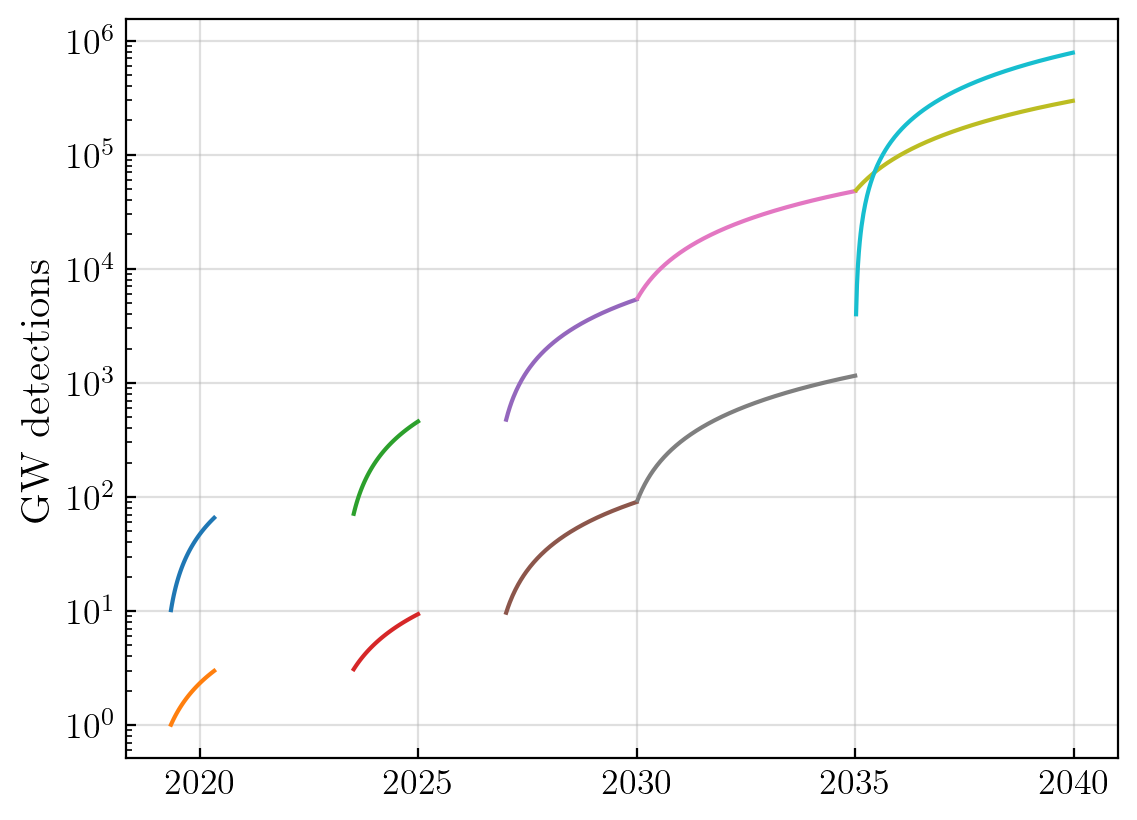

In [15]:
years = np.linspace(19,40,1000) 
#O3
n0_bbh = 10
n0_bns = 1
Nbbh_O3 = 56
Nbns_O3 = 2
yi = 19 + 4/12
yf = 20 + 4/12
rang_yr = (years > yi) & (years < yf)
plt.semilogy(years[rang_yr],n0_bbh + Nbbh_O3*(years[rang_yr]-yi))
plt.semilogy(years[rang_yr],n0_bns + Nbns_O3*(years[rang_yr]-yi))
#O4
n0_bbh = n0_bbh + Nbbh_O3*(yf-yi)
n0_bns = n0_bns + Nbns_O3*(yf-yi)
yi = 23 + 6/12
yf = 24 + 12/12
rang_yr = (years >= yi) & (years < yf)
plt.semilogy(years[rang_yr],n0_bbh + Nbbh_O4*(years[rang_yr]-yi))
plt.semilogy(years[rang_yr],n0_bns + Nbns_O4*(years[rang_yr]-yi))
#O5
n0_bbh = n0_bbh + Nbbh_O4*(yf-yi)
n0_bns = n0_bns + Nbns_O4*(yf-yi)
yi = 27 + 0*9/12
yf = 30 + 0*9/12
rang_yr = (years >= yi) & (years < yf)
plt.semilogy(years[rang_yr],n0_bbh + Nbbh_Aplus*(years[rang_yr]-yi))
plt.semilogy(years[rang_yr],n0_bns + Nbns_Aplus*(years[rang_yr]-yi))
#Voyager
n0_bbh = n0_bbh + Nbbh_Aplus*(yf-yi)
n0_bns = n0_bns + Nbns_Aplus*(yf-yi)
yi = 30 + 0/12
yf = 35 + 0/12
rang_yr = (years >= yi) & (years < yf)
plt.semilogy(years[rang_yr],n0_bbh + Nbbh_Asharp*(years[rang_yr]-yi))
plt.semilogy(years[rang_yr],n0_bns + Nbns_Asharp*(years[rang_yr]-yi))
#XG
n0_bbh = n0_bbh + Nbbh_Asharp*(yf-yi)
n0_bns = n0_bns + Nbns_Asharp*(yf-yi)
yi = 35 + 0/12
yf = 40 + 0/12
rang_yr = (years >= yi) & (years < yf)
plt.semilogy(years[rang_yr],n0_bbh + Nbbh_CE*(years[rang_yr]-yi))
plt.semilogy(years[rang_yr],n0_bns + Nbns_CE*(years[rang_yr]-yi))

plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.ylabel('GW detections',fontsize=fontSz)
plt.xticks([20,25,30,35,40],['2020','2025','2030','2035','2040'])

plt.hist(np.ones(2),np.array([20,21]))

plt.grid(alpha=0.4)
plt.show()

We load our horizon distance (see [horizon_distance](horizon_distance.ipynb)).

In [34]:
from scipy.interpolate import interp1d

""" Horizon distance """
datazhorO3 = np.genfromtxt('gw_detector_horizon/zhor_max_o3.txt')
massesO3=datazhorO3[:,0]
zhorO3=datazhorO3[:,1]
zhormaxO3 = interp1d(massesO3,zhorO3,bounds_error=False,fill_value=0.0)

datazhorO4 = np.genfromtxt('gw_detector_horizon/zhor_max_o4.txt')
massesO4=datazhorO4[:,0]
zhorO4=datazhorO4[:,1]
zhormaxO4 = interp1d(massesO4,zhorO4,bounds_error=False,fill_value=0.0)

datazhorAplus = np.genfromtxt('gw_detector_horizon/zhor_max_aplus.txt')
massesAplus=datazhorAplus[:,0]
zhorAplus=datazhorAplus[:,1]
zhormaxAplus = interp1d(massesAplus,zhorAplus,bounds_error=False,fill_value=0.0)

datazhorAsharp = np.genfromtxt('gw_detector_horizon/zhor_max_asharp.txt')
massesAsharp=datazhorAsharp[:,0]
zhorAsharp=datazhorAsharp[:,1]
zhormaxAsharp = interp1d(massesAsharp,zhorAsharp,bounds_error=False,fill_value='extrapolate')

datazhorCE = np.genfromtxt('gw_detector_horizon/zhor_max_ce.txt')
massesCE=datazhorCE[:,0]
zhorCE=datazhorCE[:,1]
zhormaxCE = interp1d(massesCE,zhorCE,bounds_error=False,fill_value='extrapolate')


We plot the expected number of events for a given population of events and a given network configuration. We also plot the horizon distance for the detectors.

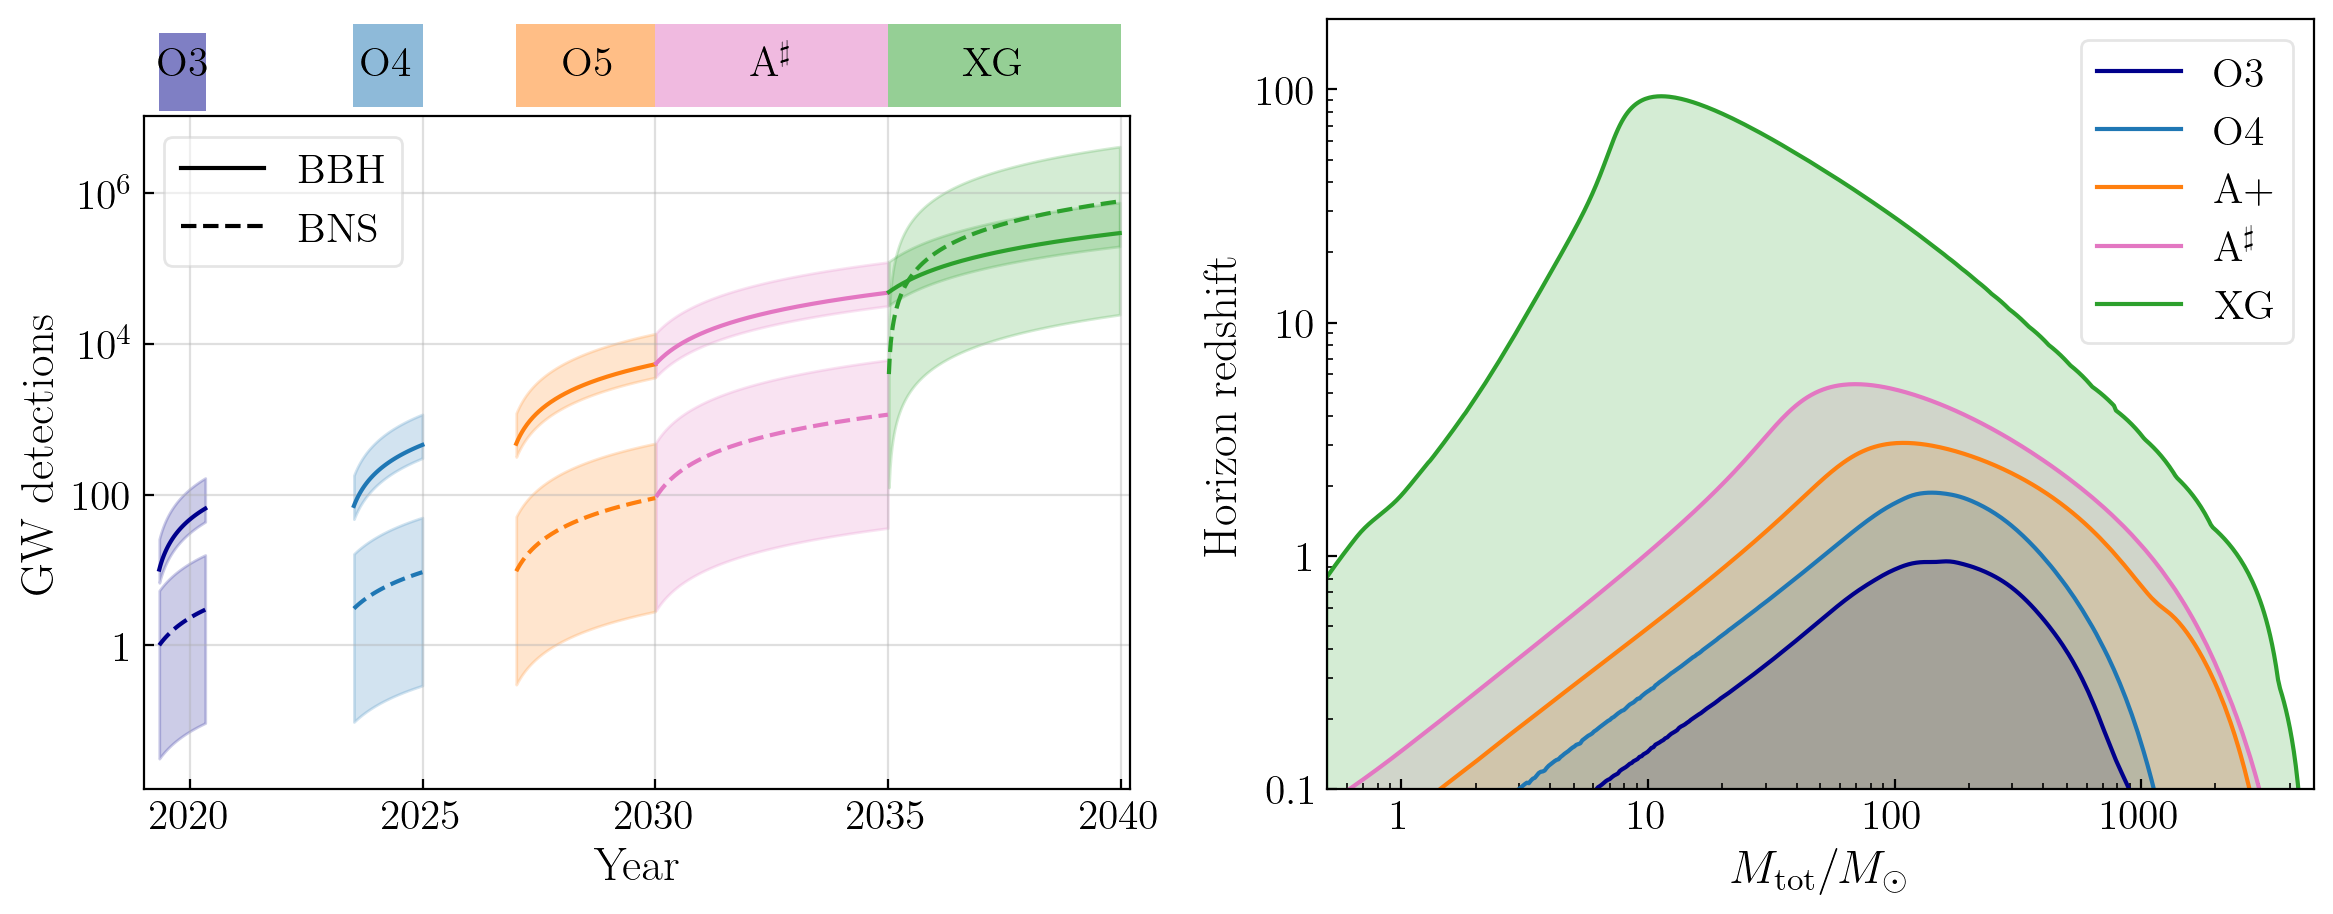

In [47]:
R0_bbh_up = 61./R0_bbh
R0_bbh_down = 16./R0_bbh
R0_bns_up = 1700/R0_bns
R0_bns_down = 10./R0_bns

plt.subplots(figsize=(14, 5))#

color_O3 = 'darkblue'
color_O4 = new_colors[0]
color_O5 = new_colors[1]
color_voy = new_colors[6]
color_3G = new_colors[2]

ax1 = plt.subplot2grid((8,2),(0,0),rowspan=1)
ax2 = plt.subplot2grid((8,2),(1,0),rowspan=7)
ax3 = plt.subplot2grid((8,2),(0,1),rowspan=8)
plt.subplots_adjust(hspace = .05)
#------------
years = np.linspace(19,40,1000) #from 2019 to 2035 
year_min = 19
year_max = 40.2
#------------
#ax1
#------------
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.axis('off')

ax1.barh(0.4,1,height = 0.9, left = 19 + 4/12, alpha = 0.5,color=color_O3) #O3
ax1.text(.015, 0.7, r'O3', transform=ax1.transAxes, fontsize=fontSz,verticalalignment='top')
ax1.barh(0.5,1.5,height = 0.9, left = 23 + 6/12, alpha = 0.5,color=color_O4) #O4
ax1.text(.22, 0.7, r'O4', transform=ax1.transAxes, fontsize=fontSz,verticalalignment='top')
ax1.barh(0.5,3.,height = 0.9, left = 27 + 0/12, alpha = 0.5,color=color_O5) #O5
ax1.text(.425, 0.7, r'O5', transform=ax1.transAxes, fontsize=fontSz,verticalalignment='top')
ax1.barh(0.5,5,height = 0.9, left = 30 + 0/12, alpha = 0.5,color = color_voy) #Voy
ax1.text(.615, 0.7,r'A$^\sharp$', transform=ax1.transAxes, fontsize=fontSz,verticalalignment='top')
ax1.barh(0.5,5,height = 0.9, left = 35 + 0/12, alpha = 0.5,color = color_3G) #3G
ax1.text(.83, 0.7, r'XG', transform=ax1.transAxes, fontsize=fontSz,verticalalignment='top')
ax1.set_xlim([year_min,year_max])
ax1.set_ylim([0,1])
#------------
#ax2
#------------
#O3
n0_bbh = 10
n0_bns = 1
Nbbh_O3 = 56
Nbns_O3 = 2
yi = 19 + 4/12
yf = 20 + 4/12
rang_yr = (years > yi) & (years < yf)
ax2.semilogy(years[rang_yr],n0_bbh + Nbbh_O3*(years[rang_yr]-yi),color=color_O3)
ax2.semilogy(years[rang_yr],n0_bns + Nbns_O3*(years[rang_yr]-yi),color=color_O3,ls='--')
ax2.fill_between(years[rang_yr],(n0_bbh + Nbbh_O3*(years[rang_yr]-yi))*R0_bbh_up,(n0_bbh + Nbbh_O3*(years[rang_yr]-yi))*R0_bbh_down,color=color_O3,alpha=0.2)
ax2.fill_between(years[rang_yr],(n0_bns + Nbns_O3*(years[rang_yr]-yi))*R0_bns_up,(n0_bns + Nbns_O3*(years[rang_yr]-yi))*R0_bns_down,color=color_O3,alpha=0.2)
#O4
n0_bbh = n0_bbh + Nbbh_O3*(yf-yi)
n0_bns = n0_bns + Nbns_O3*(yf-yi)
yi = 23 + 6/12
yf = 24 + 12/12
rang_yr = (years >= yi) & (years < yf)
ax2.semilogy(years[rang_yr],n0_bbh + Nbbh_O4*(years[rang_yr]-yi),color=color_O4)
ax2.semilogy(years[rang_yr],n0_bns + Nbns_O4*(years[rang_yr]-yi),color=color_O4,ls='--')
ax2.fill_between(years[rang_yr],(n0_bbh + Nbbh_O4*(years[rang_yr]-yi))*R0_bbh_up,(n0_bbh + Nbbh_O4*(years[rang_yr]-yi))*R0_bbh_down,alpha=0.2,color=color_O4)
ax2.fill_between(years[rang_yr],(n0_bns + Nbns_O4*(years[rang_yr]-yi))*R0_bns_up,(n0_bns + Nbns_O4*(years[rang_yr]-yi))*R0_bns_down,alpha=0.2,color=color_O4)
#O5
n0_bbh = n0_bbh + Nbbh_O4*(yf-yi)
n0_bns = n0_bns + Nbns_O4*(yf-yi)
yi = 27 + 0*9/12
yf = 30 + 0*9/12
rang_yr = (years >= yi) & (years < yf)
ax2.semilogy(years[rang_yr],n0_bbh + Nbbh_Aplus*(years[rang_yr]-yi),color=color_O5)
ax2.semilogy(years[rang_yr],n0_bns + Nbns_Aplus*(years[rang_yr]-yi),color=color_O5,ls='--')
ax2.fill_between(years[rang_yr],(n0_bbh + Nbbh_Aplus*(years[rang_yr]-yi))*R0_bbh_up,(n0_bbh + Nbbh_Aplus*(years[rang_yr]-yi))*R0_bbh_down,alpha=0.2,color=color_O5)
ax2.fill_between(years[rang_yr],(n0_bns + Nbns_Aplus*(years[rang_yr]-yi))*R0_bns_up,(n0_bns + Nbns_Aplus*(years[rang_yr]-yi))*R0_bns_down,alpha=0.2,color=color_O5)
#Voyager
n0_bbh = n0_bbh + Nbbh_Aplus*(yf-yi)
n0_bns = n0_bns + Nbns_Aplus*(yf-yi)
yi = 30 + 0/12
yf = 35 + 0/12
rang_yr = (years >= yi) & (years < yf)
ax2.semilogy(years[rang_yr],n0_bbh + Nbbh_Asharp*(years[rang_yr]-yi),color=color_voy)
ax2.semilogy(years[rang_yr],n0_bns + Nbns_Asharp*(years[rang_yr]-yi),color=color_voy,ls='--')
ax2.fill_between(years[rang_yr],(n0_bbh + Nbbh_Asharp*(years[rang_yr]-yi))*R0_bbh_up,(n0_bbh + Nbbh_Asharp*(years[rang_yr]-yi))*R0_bbh_down,color=color_voy,alpha=0.2)
ax2.fill_between(years[rang_yr],(n0_bns + Nbns_Asharp*(years[rang_yr]-yi))*R0_bns_up,(n0_bns + Nbns_Asharp*(years[rang_yr]-yi))*R0_bns_down,color=color_voy,alpha=0.2)
#3G
n0_bbh = n0_bbh + Nbbh_Asharp*(yf-yi)
n0_bns = n0_bns + Nbns_Asharp*(yf-yi)
yi = 35 + 0/12
yf = 40 + 0/12
rang_yr = (years >= yi) & (years < yf)
ax2.semilogy(years[rang_yr],n0_bbh + Nbbh_CE*(years[rang_yr]-yi),color=color_3G)
ax2.semilogy(years[rang_yr],n0_bns + Nbns_CE*(years[rang_yr]-yi),color=color_3G,ls='--')
ax2.fill_between(years[rang_yr],(n0_bbh + Nbbh_CE*(years[rang_yr]-yi))*R0_bbh_up,(n0_bbh + Nbbh_CE*(years[rang_yr]-yi))*R0_bbh_down,color=color_3G,alpha=0.2)
ax2.fill_between(years[rang_yr],(n0_bns + Nbns_CE*(years[rang_yr]-yi))*R0_bns_up,(n0_bns + Nbns_CE*(years[rang_yr]-yi))*R0_bns_down,color=color_3G,alpha=0.2)

ax2.plot([],'k-',label='BBH')
ax2.plot([],'k--',label='BNS')
ax2.legend(fontsize=fontSz, framealpha=0.5)

ax2.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
ax2.set_ylabel('GW detections',fontsize=fontSZ)
ax2.set_xlabel('Year',fontsize=fontSZ)
ax2.set_xticks([20,25,30,35,40])
ax2.set_xticklabels(['2020','2025','2030','2035','2040'])
ax2.set_yticks([1,1e2,1e4,1e6])
ax2.set_yticklabels(['1','100','10$^4$','10$^6$'])
ax2.grid(alpha=0.4)
ax2.set_xlim([year_min,year_max])

#ax2.plot(24,200,'*',markersize=15,markerfacecolor="yellow", markeredgecolor="black")
#ax2.text(.15, 0.55, r'Now', transform=ax2.transAxes, fontsize=fontSz,verticalalignment='top')

#------------
#ax3
#------------
mtots = np.logspace(np.log10(0.5),np.log10(5e3),500)

###CHANGE NOW

ax3.loglog(mtots,zhormaxO3(mtots),color=color_O3,label='O3')
ax3.fill_between(mtots,zhormaxO3(mtots),color=color_O3,alpha=0.2)
ax3.loglog(mtots,zhormaxO4(mtots),color=color_O4,label='O4')
ax3.fill_between(mtots,zhormaxO4(mtots),color=color_O4,alpha=0.2)
ax3.loglog(mtots,zhormaxAplus(mtots),color=color_O5,label='A+')
ax3.fill_between(mtots,zhormaxAplus(mtots),color=color_O5,alpha=0.2)
ax3.loglog(mtots,zhormaxAsharp(mtots),color = color_voy,label=r'A$^\sharp$')
ax3.fill_between(mtots,zhormaxAsharp(mtots),color = color_voy,alpha=0.2)
#ax3.loglog(mtots,zhormaxET(mtots),color = new_colors[2],label='ET (3G)')
#ax3.fill_between(mtots,zhormaxET(mtots),color = new_colors[2],alpha=0.2)
ax3.loglog(mtots,zhormaxCE(mtots),color = color_3G,label='XG')
ax3.fill_between(mtots,zhormaxCE(mtots),color = color_3G,alpha=0.2)

ax3.set_ylim([1e-1,2e2])
ax3.set_xticks([1,10,100,1000])
ax3.set_xticklabels(['1','10','100','1000'])
ax3.set_yticks([0.1,1,10,100])
ax3.set_yticklabels(['0.1','1','10','100'])
ax3.set_xlim([min(mtots),max(mtots)])
ax3.tick_params(axis='both',which='both',direction='in',labelsize=fontSz)
ax3.set_ylabel('Horizon redshift',fontsize=fontSZ)
ax3.set_xlabel('$M_\mathrm{tot}/M_\odot$',fontsize=fontSZ)
#plt.grid()
ax3.legend(fontsize=fontSz, framealpha=0.5)

plt.savefig(dir_out+'projection_number_events.pdf', bbox_inches='tight', transparent=True)
#plt.savefig(dir_out+'projection_number_events.jpg', bbox_inches='tight', transparent=True,dpi=300)
plt.show()


## Plotting the mass spectrum

In [10]:
#Fiducial universe
#-----------------

#Cosmology
#---------
H0_fid = 67.66 # cosmo.H(0).value #cosmology is Planck'18
Om0_fid = 0.30966 # cosmo.Om(0) #cosmology is Planck'18

#Merger rate
#-----------
# It follows the star formation rate from Madau & Dickinson (2014) (https://arxiv.org/abs/1403.0007)
r0_fid = 30.
r0_bns_fid = 240.
alpha_z_fid = 2.7
zp_fid = 1.9
beta_fid = 5.6 - alpha_z_fid

#BBH Mass distribution
#-----------------
#Primary mass
mmin_pl_fid = 0.01 #Minimum mass for the power-law
mmax_pl_fid = 150. #Maximum mass for the power-law
mMin_filter_fid = 8.75 #Minimum mass for the low-mass filter
mMax_filter_fid = 87. #Maximum mass for the high-mass filter
dmMin_filter_fid = 1. 
dmMax_filter_fid = 2.
alpha_fid = -3.4
sig_m1_fid = 3.6
mu_m1_fid = 34.
f_peak_fid = 1.4e-8

#Mass ratio
bq_fid = 1.1


#BNS Mass distribution
#-----------------
#Primary mass
mmin_bns_fid = 1.1 #Minimum mass for the uniform distribution
mmax_bns_fid = 2.1 #Maximum mass for the uniform distribution
width_bns_fid = mmax_bns_fid - mmin_bns_fid #Width of the uniform distribution
filter_bns_fid = 0.05 #Filter for the uniform distribution

mmin_pl_bns_fid = 0.01 #Minimum mass for the power-law
mmax_pl_bns_fid = 3. #Maximum mass for the power-law

#Mass ratio
bq_bns_fid = 0.0

Tobs_fid = 1. #yr

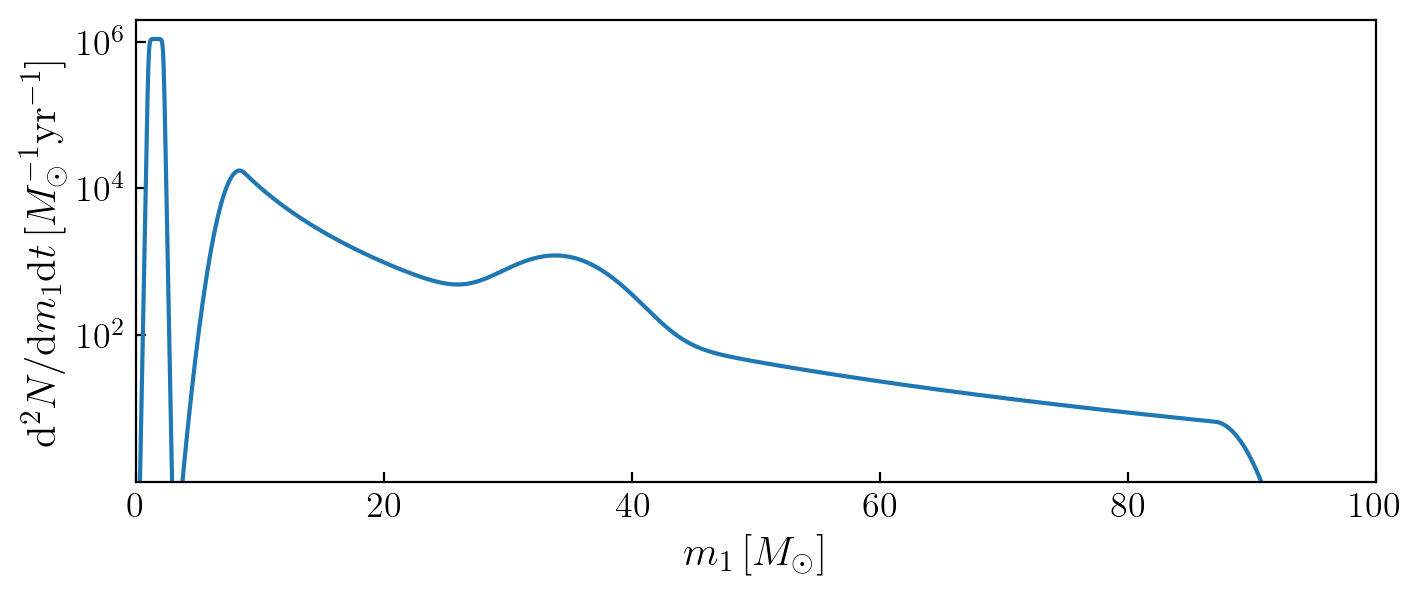

In [29]:
ms_bns = np.linspace(0.01, 3, 1000)
pm_bns = gwpop.box_sig(ms_bns,mmin_bns_fid,width_bns_fid,filter_bns_fid)
pm_bns = pm_bns/np.trapz(pm_bns,ms_bns)

ms = np.linspace(0.1, 150, 1000)
pm = gwpop.powerlaw_peak_smooth(ms,mmin_pl_fid,mmax_pl_fid,alpha_fid,sig_m1_fid,mu_m1_fid,f_peak_fid,mMin_filter_fid,mMax_filter_fid,dmMin_filter_fid,dmMax_filter_fid)
pm = pm/np.trapz(pm,ms)

plt.subplots(figsize=(8, 3))#

plt.plot(ms_bns, Nbns*pm_bns,label='BNS')
plt.plot(ms, Nbbh*pm,label='Smooth power-law + peak',color=new_colors[0])

plt.xlabel(r'$m_1\,[M_\odot]$',fontsize=fontSz)
plt.ylabel(r'$\mathrm{d}^2N/\mathrm{d}m_1\mathrm{d}t\,[M_\odot^{-1}\mathrm{yr}^{-1}]$',fontsize=fontSz)
plt.tick_params(axis='both', which='major',direction='in', labelsize=fontsz)
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1,2e6)
plt.xlim(0,100)
plt.yticks([1e2,1e4,1e6])
#plt.legend()
plt.savefig(dir_out+'cbc_mass_spectrum.pdf', bbox_inches='tight', transparent=True)
plt.show()

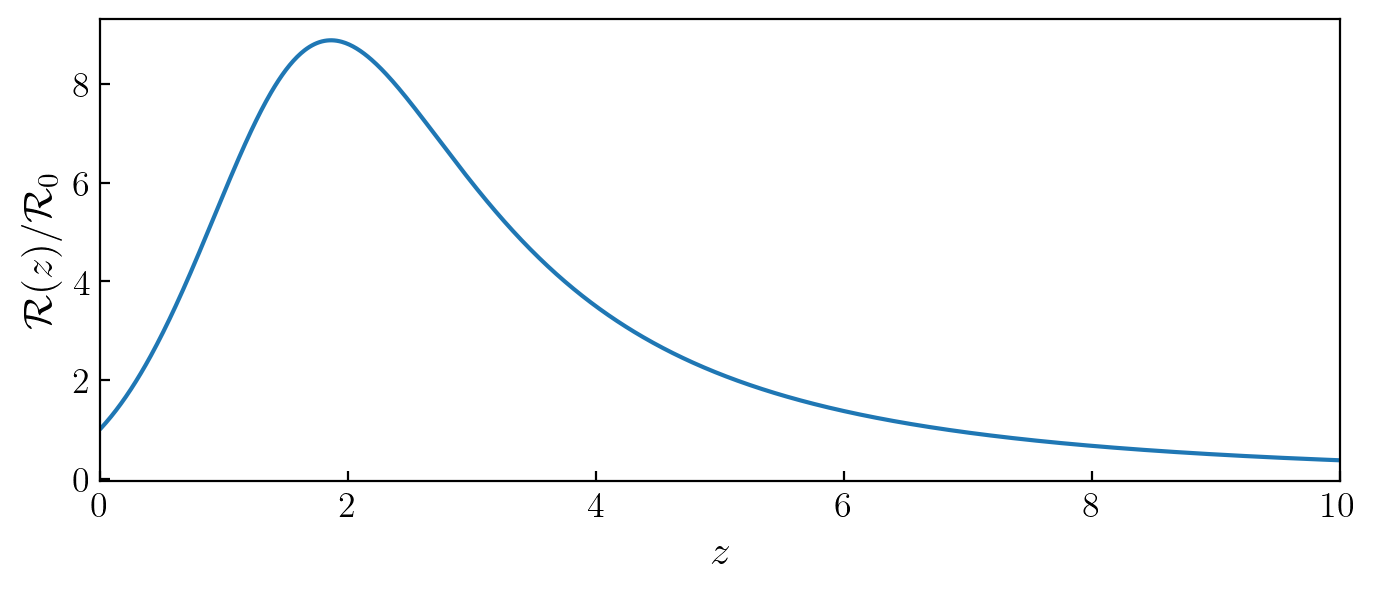

In [31]:
zs = np.linspace(0.01, 10, 1000)
pz = gwpop.rate_z(zs,zp_fid,alpha_z_fid,beta_fid)

plt.subplots(figsize=(8, 3))#
plt.plot(zs, pz,label='SFR')
plt.xlabel(r'$z$',fontsize=fontSz)
plt.ylabel(r'$\mathcal{R}(z)/\mathcal{R}_0$',fontsize=fontSz)
plt.tick_params(axis='both', which='major',direction='in', labelsize=fontsz)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(1e-3,1e3)
plt.xlim(0,10)
#plt.yticks([1e-2,1e0,1e2])
#plt.legend()
plt.savefig(dir_out+'cbc_redshift_distribution.pdf', bbox_inches='tight', transparent=True)
plt.show()